## CS4243 Lab 3: Feature Matching and Applications

**ASSIGNMENT SUBMISSION DEADLINE: Mar. 17, 22h00**

**Instructions:**
- See `lab3.pdf` and `lab3.py` for detailed descriptions.

- The functions to be implemented are given in `lab3.py`, with a description of each function. You will need to fill in the code where it is marked with the following:
    ```
    """ Your code starts here """

    """ Your code ends here """
    ```
    
- For open questions, write your answers directly into the notebook. 

- The test images are given in folder `data/input` and sample outputs are provided in `data/output`.

- You are free to use NumPy functions, but you may not use built-in functions of OpenCV aside from those already in the code template. Exceptions will be explicitly stated.

**Attention:**
- Please use python with version >= 3.8.4, and install the libs provided in requirements.txt via `pip install -r requirements.txt`.
- Please do not change the structure of files in the whole folder of this assignment, otherwise TA may mark your code wrongly.
- Please do not change the inputs arguments of the functions in `lab3.py`, otherwise your implementation would fail to pass the test.
- The functions in `utils.py` are to help us and should not have to be changed. Nonetheless, feel free to make adjustments if there are issues on your end.
- As long as your output is close to the expected answer, you will get full credit.

**Submission instructions:**

Upload to Canvas your completed `lab3.py` and `lab3.ipynb` by zipping them into a file named AXXX1_AXXX2.zip, where AXXX is the student number of the group members. Submit one file per group. Missing files, incorrectly formatted code that does not run, etc. will be penalized.

If you have any question regarding this lab, do not hesistate to ask questions under the Labs section on Canvas Discussions. You can also attend any lab slot for FAQs.

In [19]:
import numpy as np
from skimage import filters
from skimage.feature import corner_peaks
import matplotlib.pyplot as plt
import cv2

In [20]:
from lab3 import *
from utils import *
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part 1: Keypoint Detection, Description, and Matching (40%)

### 1.1 Keypoint detection (7%)

We will start by implementing a simple detector.

**Goal**: Implement `harris_corners()` function and then run the code cells below.

Hint: You may use the function `scipy.ndimage.filters.convolve()`, which is already imported.

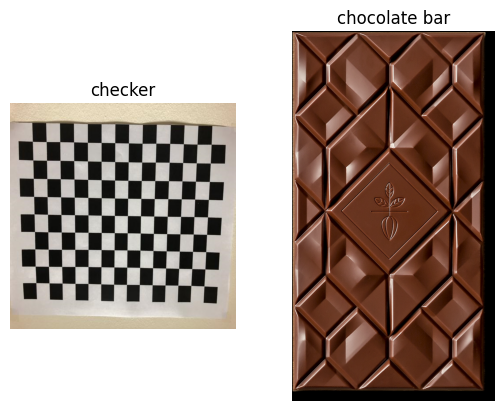

In [21]:
# Before working on the corner detectors, let's see what the original images look like
plt.subplot(1,2,1)
plt.imshow(cv2_imread('data/input/checker.png'))
plt.axis('off')
plt.title('checker')

plt.subplot(1,2,2)
plt.imshow(cv2_imread('data/input/chocolate_bar.png'))
plt.axis('off')
plt.title('chocolate bar')
plt.show()

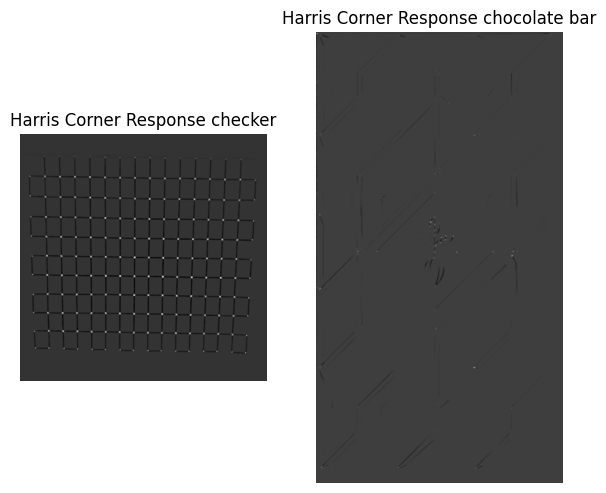

In [22]:
img1 = cv2.imread('data/input/checker.png', 0)
img2 = cv2.imread('data/input/chocolate_bar.png', 0)

# Compute Harris corner response
response1 = harris_corners(img1)
response2 = harris_corners(img2)

# Display corner response
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(response1, cmap='gray')
plt.axis('off')
plt.title('Harris Corner Response checker')


plt.subplot(1,2,2)
plt.imshow(response2, cmap='gray')
plt.axis('off')
plt.title('Harris Corner Response chocolate bar')
plt.show()

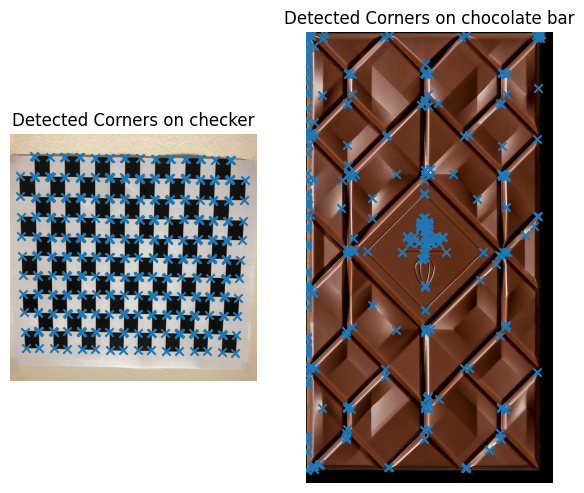

In [23]:
# Perform non-maximum suppression in response map
# and output corner coordiantes
corners1 = corner_peaks(response1, threshold_rel=0.01)
corners2 = corner_peaks(response2, threshold_rel=0.01)

# Display detected corners
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(cv2_imread('data/input/checker.png'))
plt.scatter(corners1[:,1], corners1[:,0], marker='x')
plt.axis('off')
plt.title('Detected Corners on checker')

plt.subplot(1,2,2)
plt.imshow(cv2_imread('data/input/chocolate_bar.png'))
plt.scatter(corners2[:,1], corners2[:,0], marker='x')
plt.axis('off')
plt.title('Detected Corners on chocolate bar')
plt.show()

Now, let's test our keypoint detector on an image of a movie poster and its rotated version.

**NOTE**: Don't remove the commented codes.

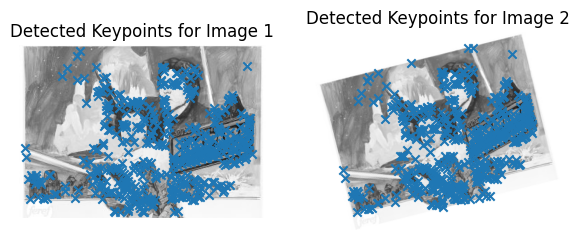

In [24]:
img1 = cv2.imread('data/input/poster.png', 0)
img2 = cv2.imread('data/input/poster_rotated.png', 0)
img1_c = cv2_imread('data/input/poster.png')
img2_c = cv2_imread('data/input/poster_rotated.png')

# Uncomment the four lines below later (COME BACK WHEN YOU REACH THE EXPLORATORY SECTION)
# img1 = cv2.imread('data/input/poster.png', 0)
# img2 = cv2.imread('data/input/poster_upright.png', 0)
# img1_c = cv2_imread('data/input/poster.png')
# img2_c = cv2_imread('data/input/poster_upright.png')

# Detect keypoints in two images
keypoints1 = corner_peaks(harris_corners(img1, window_size=3),
                          threshold_rel=0.05,
                          exclude_border=8)
keypoints2 = corner_peaks(harris_corners(img2, window_size=3),
                          threshold_rel=0.05,
                          exclude_border=8)

# Display detected keypoints
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(img1_c)
plt.scatter(keypoints1[:,1], keypoints1[:,0], marker='x')
plt.axis('off')
plt.title('Detected Keypoints for Image 1')

plt.subplot(1,2,2)
plt.imshow(img2_c)
plt.scatter(keypoints2[:,1], keypoints2[:,0], marker='x')
plt.axis('off')
plt.title('Detected Keypoints for Image 2')
plt.show()

### 1.2 Keypoint description (15%)

After we are able to identify the keypoints, we will move on to the next part: describing these keypoints.

**Goal**: Implement the `naive_descriptor()` and `simple_sift()` functions before proceeding to the next section. 

We provide you the function `describe_keypoints()` which takes as argument an image, a list of keypoints on that image, a descriptor function, and patch size. For each keypoint on the image, a region equal to patch size will be extracted, and the descriptor function is used to describe that region. 

### 1.3 Keypoint matching (8%) 


**Goal**: Implement `top_k_matches()` and `ratio_test_match()`.

Next, let's see our descriptors and "matcher" in action.

In [25]:
# Don't change this
NAIVE_DESC_PATCH_SIZE = 5
SIMPLE_SIFT_PATCH_SIZE = 16

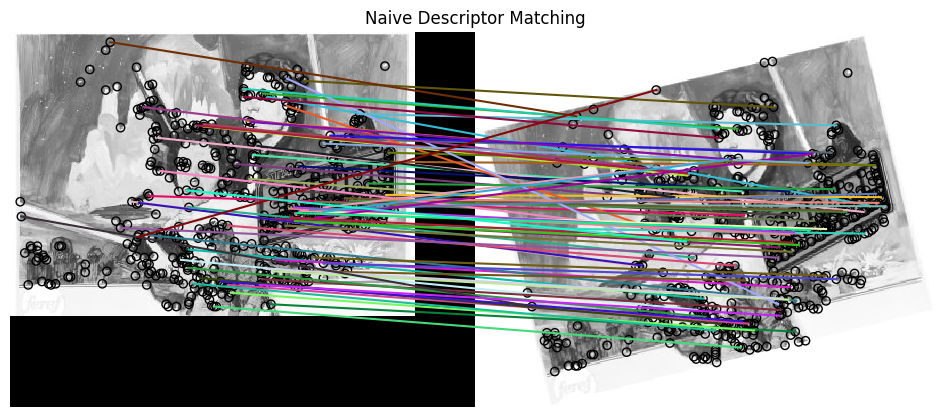

In [26]:
# Extract features from the corners
desc1 = describe_keypoints(img1, keypoints1,
                           desc_func=naive_descriptor,
                           patch_size=NAIVE_DESC_PATCH_SIZE)
desc2 = describe_keypoints(img2, keypoints2,
                           desc_func=naive_descriptor,
                           patch_size=NAIVE_DESC_PATCH_SIZE)

# Match descriptors in image1 to those in image2

match_threshold = 0.75
matches = ratio_test_match(desc1, desc2, match_threshold)

# Plot matches
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.axis('off')
plot_matches(ax, img1_c, img2_c, keypoints1, keypoints2, matches)
plt.title("Naive Descriptor Matching")
plt.show()

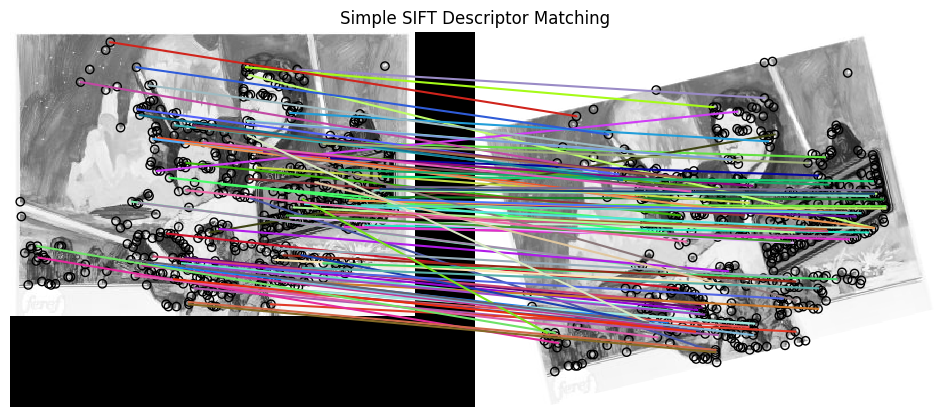

In [27]:
# Detect keypoints in both images
keypoints1 = corner_peaks(harris_corners(img1, window_size=3),
                          threshold_rel=0.05,
                          exclude_border=8)
keypoints2 = corner_peaks(harris_corners(img2, window_size=3),
                          threshold_rel=0.05,
                          exclude_border=8)

# Extract features from the corners
desc1 = describe_keypoints(img1, keypoints1,
                           desc_func=simple_sift,
                           patch_size=SIMPLE_SIFT_PATCH_SIZE)
desc2 = describe_keypoints(img2, keypoints2,
                           desc_func=simple_sift,
                           patch_size=SIMPLE_SIFT_PATCH_SIZE)

# Match descriptors in image1 to those in image2
match_threshold = 0.75
matches = ratio_test_match(desc1, desc2, match_threshold)

# Plot matches
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.axis('off')
plot_matches(ax, img1, img2, keypoints1, keypoints2, matches)
plt.title("Simple SIFT Descriptor Matching")
plt.show()

**EXPLORATORY SECTION** : Where are the good matches? **(10%)**

**Question 1** (3%): Discuss the trade-off between accepting false matches and rejecting correct matches. How does adjusting the match threshold (for ratio test) affect this?

**Answer**:

There is a fine line in choosing our ratio as too low results in many false negatives (matches which are not matched) and if the ratio is too high, we will have many we will have many false matches, resulting in many false positives.

The ratio calculates feature distance. If the ratio is high, it means the best match and 2nd best match are very similar. So you might end up with low number of correct matches because you include alot of ambiguous matches. If it is too low, the best match and 2nd best match are very different. Hence you end up with low number of matches, missing true matches in the process.



**Question 2** (3%): Compare the matching results that you get using `naive_descriptor()` and `simple_sift()`. Increase the value for `match_threshold` and rerun the cells. What do you observe?
    
**Answer**:

It resulted in many more matches (alot more lines observered). It also resulted in many more false positive matches. Hence the accuracy of the matches from both `naive_descriptor()` and `simple_sift()` decreases if we increase  `match_threshold` value. 

As mentioned above, increasing the threshold too high will result in low number of correct matches since we included alot of ambiguious matches.

**Question 3** (4%): Remember the cell with commented codes? Uncomment those lines to run the describing and matching process again, using your two descriptors. In this case, the angle of rotation between the two images is 90 degree. What happens to your matching result using the simple SIFT descriptors this time? Suggest a reason. 

Also suggest ONE possible change that can be made to improve your SIFT version. 

**Answer**:

There was alot more false positives (incorrect matching of features). The simple SIFT is not really rotation invariant, and also not rotation resistant. In regular SIFT, we "Shift" the histogram by the dominant orientation. This allows regular SIFT to be rotation resistant by 60 degrees, which was not implemented for this simple SIFT.

We can do this "Shifting" of histogram by 90 degrees, which should orientated both images into the same orientation. This should allow the keypoints to allign more accurately, resulting in a better match.

## PART 2: Image Stitching (30%)

In this task, we will look at an interesting topic: fingerprint stitching, which is related to fingerprint matching. Traditional fingerprint matching relies on large-scaled features called minutiae. With the development in sensor technology, however, we are not spoilt with full fingerprint images. As a result, matching can be done using small-sized features like SIFT. 

First, use your `simple_sift()` descriptor on two images: `fp1.png` and `fp2.png`. These two are segments cut from a full fingerprint image and overlap with one another. They are known as partial fingerprints.


**Test case 1**: Easy match. **(2%)** 

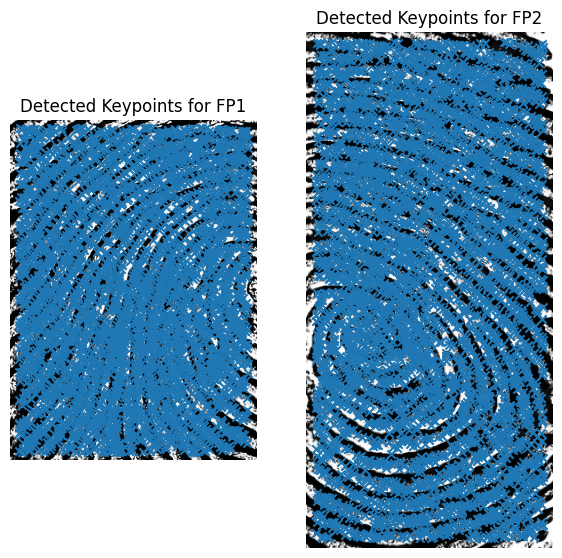

In [67]:
img1 = cv2.imread('data/input/fp1.png', 0)
img2 = cv2.imread('data/input/fp2.png', 0)

img1_c = cv2_imread('data/input/fp1.png')
img2_c = cv2_imread('data/input/fp2.png')

# Detect keypoints in two images
keypoints1 = corner_peaks(harris_corners(img1, window_size=3),
                          threshold_rel=0.05,
                          exclude_border=8)
keypoints2 = corner_peaks(harris_corners(img2, window_size=3),
                          threshold_rel=0.05,
                          exclude_border=8)

# Display detected keypoints
_ = plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(img1_c)
plt.scatter(keypoints1[:,1], keypoints1[:,0], marker='x')
plt.axis('off')
plt.title('Detected Keypoints for FP1')

plt.subplot(1,2,2)
plt.imshow(img2_c)
plt.scatter(keypoints2[:,1], keypoints2[:,0], marker='x')
plt.axis('off')
plt.title('Detected Keypoints for FP2')
plt.show()

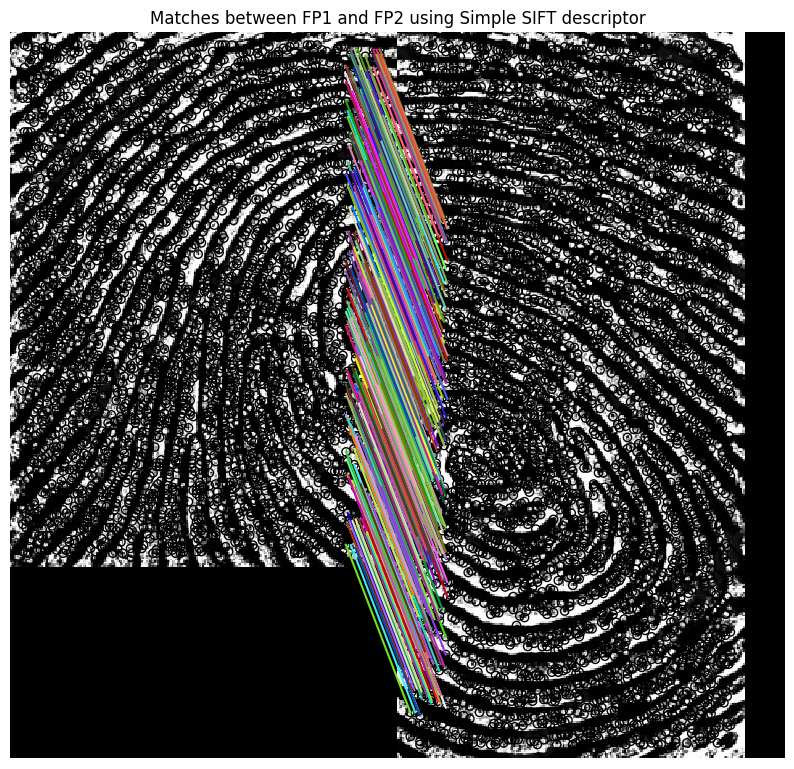

In [68]:
# Extract features from the corners
desc1 = describe_keypoints(img1, keypoints1,
                           desc_func=simple_sift,
                           patch_size=SIMPLE_SIFT_PATCH_SIZE)
desc2 = describe_keypoints(img2, keypoints2,
                           desc_func=simple_sift,
                           patch_size=SIMPLE_SIFT_PATCH_SIZE)

# Match descriptors in image1 to those in image2
# Feel free to change match_threshold, but keep the value to between 0.5-0.8
match_threshold = 0.5
matches = ratio_test_match(desc1, desc2, match_threshold)

# Plot matches
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.axis('off')
plot_matches(ax, img1_c, img2_c, keypoints1, keypoints2, matches)
plt.title('Matches between FP1 and FP2 using Simple SIFT descriptor')
plt.show()


### 2.1 Image stitching using homography  (10%)

**Goal** Implement the function `compute_homography()`. 

##### Now let's see our stitching result.
(for this part, you may want to set `match_threshold` to 0.5)

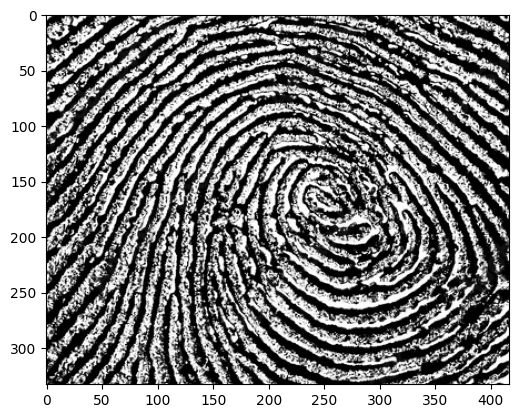

In [69]:
# Extract matched keypoints
p1 = keypoints1[matches[:,0]]
p2 = keypoints2[matches[:,1]]

# Compute Homography matrix H that maps p2 to p1
H = compute_homography(p1, p2)

final_im = trim(warp_image(img1_c, img2_c, H))
plt.imshow(final_im)

Expected answer:

<img src="data/output/fp1_2.png" width="400" height="300">

### 2.2 RANSAC (12%)

Now let's change the `match_threshold` to 0.75 and see the result:

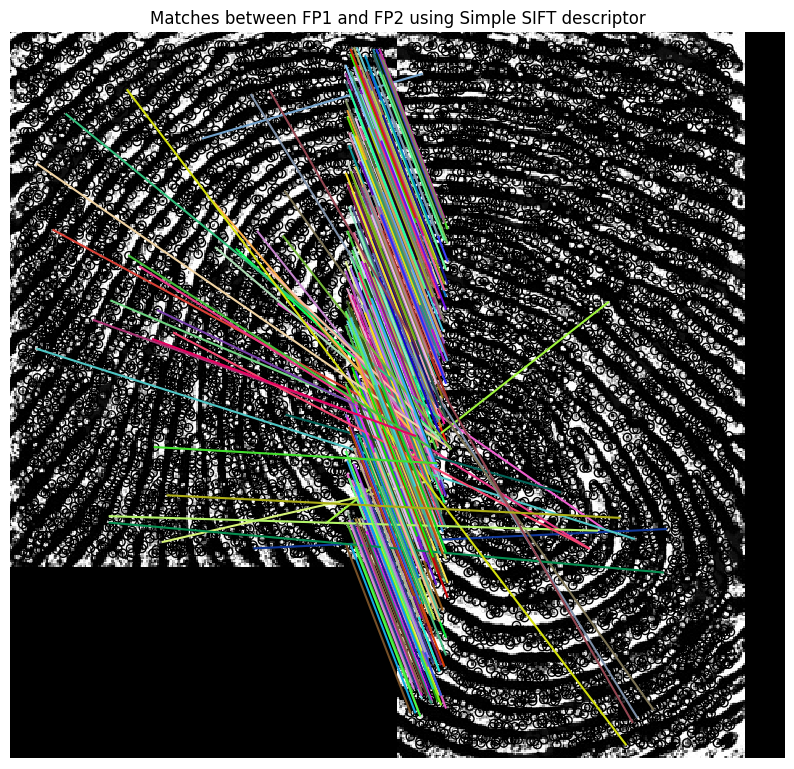

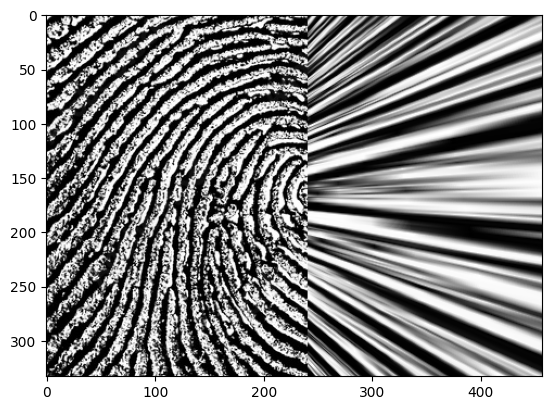

In [70]:
match_threshold = 0.75
matches = ratio_test_match(desc1, desc2, match_threshold)
from random import random
# Plot matches
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.axis('off')
plot_matches(ax, img1_c, img2_c, keypoints1, keypoints2, matches)
plt.title('Matches between FP1 and FP2 using Simple SIFT descriptor')
plt.show()

# Extract matched keypoints
p1 = keypoints1[matches[:,0]]
p2 = keypoints2[matches[:,1]]

# Compute Homography matrix H that maps p2 to p1
H = compute_homography(p1, p2)

final_im = trim(warp_image(img1_c, img2_c, H))
plt.imshow(final_im)

**Question** (2%): After changing the `match_threshold` to 0.75, is the stitching still accurate? If not, what do you think is the reason?

**Answer**:

Sometimes, the luxury of being able to use a low threshold does not belong to us and we face outliers. In this case, we can use RANSAC to pick out the inliers, following the algorithm taught in the lecture.

**Goal**: Implement the function `ransac_homography()`. 

In [ ]:
#import random

#random.seed(20)
# You can tune sampling_ratio, n_iters, and threshold if necessary
#H, robust_matches = ransac_homography(keypoints1, keypoints2, matches, sampling_ratio=0.25, n_iters=10000, delta=25)
H, robust_matches = ransac_homography(keypoints1, keypoints2, matches, sampling_ratio=0.25, n_iters=10000, delta=20, seed = 46)
# valid seeds 36, 46, 
# Visualize robust matches
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.axis('off')
plot_matches(ax, img1_c, img2_c, keypoints1, keypoints2, robust_matches, only_matches=True)
plt.title('RANSAC matches between FP1 and FP2 using Simple SIFT descriptor')
plt.show()


Let see the stitching result with RANSAC's help.

(Here you may want to change the value for `sampling_ratio` and `delta`, run the cell above again. It's fine if your answer is not perfect as when `match_threshold` was 0.5. Being close is good enough.)

In [ ]:
final_im = trim(warp_image(img1_c, img2_c, H))
plt.imshow(final_im)

Expected answer:

<img src="data/output/fp1_2_ransac.png" width="400" height="300">

**Test case 2**: Harder match **(6%)**

Now, let's look at a harder example, where replace the second image with `fp3.png`. This is also cut from the same fingerprint image, but drastically rotated from the original orientation.

**Question** (3%): Run the cell below and observe the matching results. Do you see any match when `match_threshold` is 0.7? If yes, are the matches accurate? 

Increase the `match_threshold` to 0.85. What do you observe now? Do you think that the matches displayed are good? How would they affect the stitching result? Try and see if RANSAC can help here.

**Answer**:

In [ ]:
img1 = cv2.imread('data/input/fp1.png', 0)
img2 = cv2.imread('data/input/fp3.png', 0)

img1_c = cv2_imread('data/input/fp1.png')
img2_c = cv2_imread('data/input/fp3.png')

# Detect keypoints in two images
keypoints1 = corner_peaks(harris_corners(img1, window_size=3),
                          threshold_rel=0.05,
                          exclude_border=8)
keypoints2 = corner_peaks(harris_corners(img2, window_size=3),
                          threshold_rel=0.05,
                          exclude_border=8)

# Display detected keypoints
_ = plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(img1_c)
plt.scatter(keypoints1[:,1], keypoints1[:,0], marker='x')
plt.axis('off')
plt.title('Detected Keypoints for FP1')

plt.subplot(1,2,2)
plt.imshow(img2_c)
plt.scatter(keypoints2[:,1], keypoints2[:,0], marker='x')
plt.axis('off')
plt.title('Detected Keypoints for FP3')
plt.show()

# Extract features from the corners
desc1 = describe_keypoints(img1, keypoints1,
                           desc_func=simple_sift,
                           patch_size=SIMPLE_SIFT_PATCH_SIZE)
desc2 = describe_keypoints(img2, keypoints2,
                           desc_func=simple_sift,
                           patch_size=SIMPLE_SIFT_PATCH_SIZE)


# Match descriptors in image1 to those in image2
match_threshold = 0.7
matches = ratio_test_match(desc1, desc2, match_threshold)

# Plot matches
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.axis('off')
plot_matches(ax, img1_c, img2_c, keypoints1, keypoints2, matches)
plt.show()

We provide you with a function `compute_cv2_descriptor()`, which both detects and describes keypoints on an image.
It also returns angles and sizes for the keypoints. A keypoint angle is the dominant orientation for that keypoint (do note that it is measured w.r.t to the x-axis, aka the "column" axis according to our convention). A keypoint size is the size for the keypoint; different keypoints do not need to have the same size.

You may notice that some keypoints have the same coordinates. As per the original paper, a new keypoint is created if there are more than one dominant orientation.

Let's see how this descriptor fare against our test case:

In [ ]:
keypoints1, desc1, _, _ = compute_cv2_descriptor(img1_c)
keypoints2, desc2, _, _ = compute_cv2_descriptor(img2_c)

_ = plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img1_c)
plt.scatter(keypoints1[:,1], keypoints1[:,0], marker='x')
plt.axis('off')
plt.title('Detected Keypoints for Image 1')

plt.subplot(1,2,2)
plt.imshow(img2_c)
plt.scatter(keypoints2[:,1], keypoints2[:,0], marker='x')
plt.axis('off')
plt.title('Detected Keypoints for Image 2')
plt.show()

# Match descriptors in image1 to those in image2

match_threshold = 0.6
matches = ratio_test_match(desc1, desc2, match_threshold)

# Plot matches
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.axis('off')
plot_matches(ax, img1_c, img2_c, keypoints1, keypoints2, matches)
plt.show()

In [ ]:
# You can run this cell after matching using the simple_sift, but the result is likely not good
# Extract matched keypoints
p1 = keypoints1[matches[:,0]]
p2 = keypoints2[matches[:,1]]

# Compute Homography matrix H that maps p2 to p1
H = compute_homography(p1, p2)

final_im = trim(warp_image(img1_c, img2_c, H))
plt.imshow(final_im)

Expected answer:

<img src="data/output/fp1_3_cv2SIFT.png" width="350" height="300">

In part 3, we will do some simple detection of mirror symmetry, following the method detailed in the paper "[Detecting Symmetry and Symmetric Constellations of Features](http://www.cse.psu.edu/~yul11/CourseFall2006_files/loy_eccv2006.pdf)" (Loy and Eklundh, 2006). The described method leverages matching of feature points; each match pair is used to generate a parameter point that defines the reflection line. Hough Voting, the technique that you have learnt and experimented with for lab 2, will be used as well.

## PART 3: Mirror Symmetry Detection (30%)
   
We provide three functions for you: `angle_with_x_axis()`, `midpoint()`, and `distance()`.

**Test case 1**: Line of symmetry **(2%)**

First, let's look at the image of a butterfly and its mirrored version (over the vertical-axis):

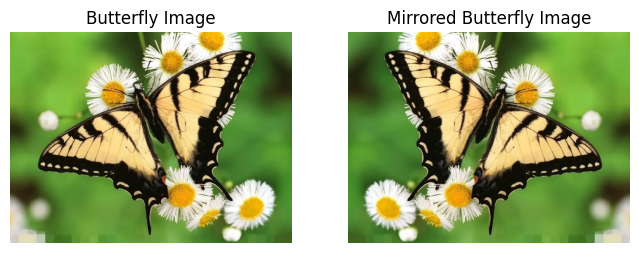

In [19]:
butterfly_path = "data/input/butterfly.png"
butterfly_im = cv2.imread(butterfly_path, 0)

mirror_butterfly_im = np.fliplr(butterfly_im)

butterfly_im_c = cv2_imread(butterfly_path)
m_butterfly_im_c = np.fliplr(butterfly_im_c)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(butterfly_im_c)
plt.axis('off')
plt.title('Butterfly Image')

plt.subplot(1,2,2)
plt.imshow(m_butterfly_im_c)

plt.axis('off')
plt.title('Mirrored Butterfly Image')
plt.show()

### 3.1 Generate descriptors and mirror descriptors for the images (6%)

**Goal**: Implement the functions `shift_sift_descriptors()` and use it to implement `create_mirror_descriptors()`.

Hint: refer to `lab3.py`. You may also want to use the `compute_cv2_descriptor()` function on the flipped version of an image (using `np.fliplr`) and observe how the histogram changes.

### 3.2 Match keypoints from an image and the virtual descriptors (6%)


**Goal**: Implement the function `match_mirror_descriptors()`. 

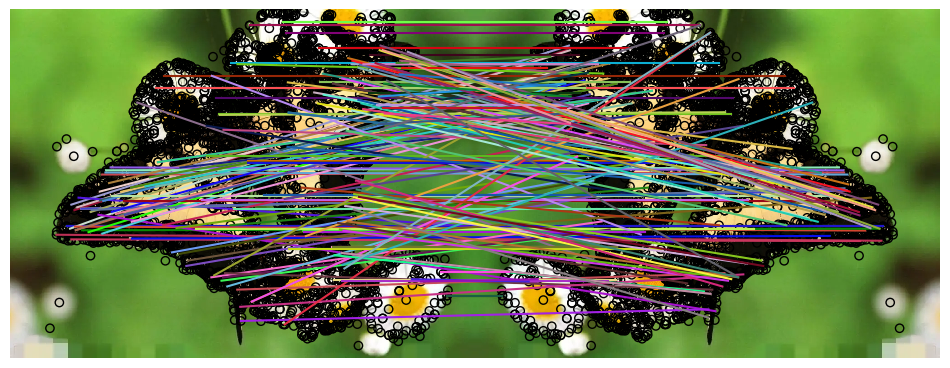

In [20]:
kps, descs, sizes, angles, mir_descs = create_mirror_descriptors(butterfly_im)
matches = match_mirror_descriptors(descs, mir_descs)
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.axis('off')
plot_mirror_matches(ax, butterfly_im_c, kps, matches) 
plt.show()

### 3.3 Generate symmetry line parameters (6%)

After collecting the pairs of matched keypoints from the previous step, we will make use of the point coordinates for each pair to vote for ρ and θ in a 2D Hough space.

**Goal**: Implement `find_symmetry_lines()`. Use this function to implement the next one.

### 3.4 Perform Hough voting for mirror line (6%)

**Goal**: Implement `hough_vote_mirror()`. 

Hint: the function `find_peak_params` is provided for you. Note that this function have two parameters `window`, `threshold` that can be adjusted.

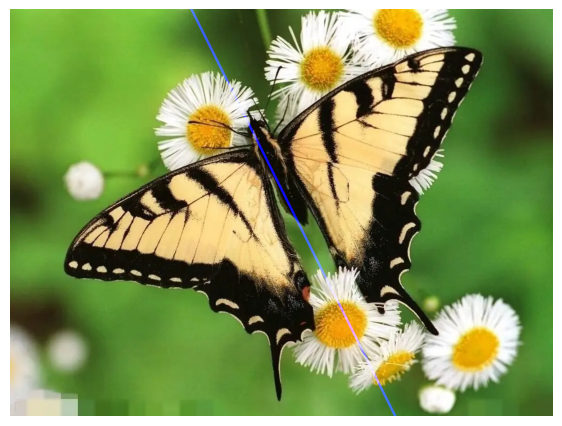

In [21]:
rhos, thetas = hough_vote_mirror(matches, kps, butterfly_im.shape, window=1, threshold=0.5, num_lines=1)
draw_mirror_line(butterfly_im_c.copy() , rhos, thetas)

Expected answer:

<img src="data/output/butterfly.png" width="250" height="200">

Now, we will take on a more difficult example.

**Test case 2**: Kick-me some challenge **(2%)**

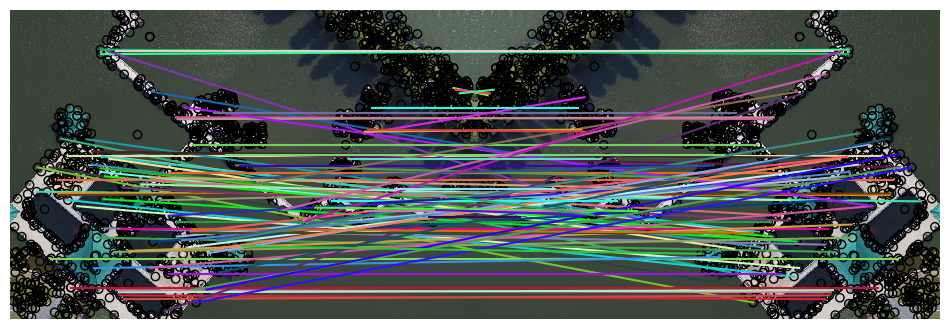

In [22]:
topview_path = "data/input/topview.png"
topview_im = cv2.imread(topview_path, 0)
topview_im_c = cv2_imread(topview_path)

topview_kps, topview_descs, _, _, mirr_topview_descs = create_mirror_descriptors(topview_im_c)



topview_matches = match_mirror_descriptors(topview_descs, mirr_topview_descs, threshold=0.7)



fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.axis('off')
plot_mirror_matches(ax, topview_im_c, topview_kps, topview_matches)
plt.show()

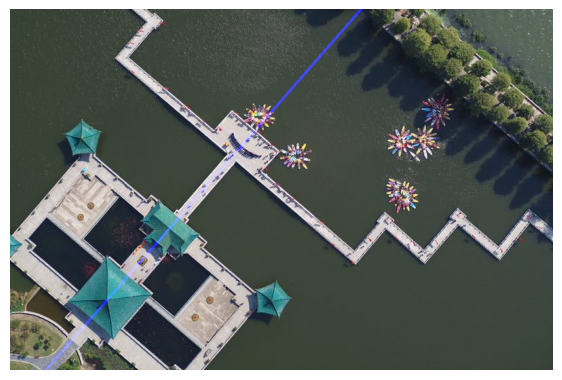

In [23]:
rhos, thetas = hough_vote_mirror(topview_matches, topview_kps, topview_im.shape,  num_lines=1)
draw_mirror_line(topview_im_c.copy() , rhos, thetas)

Expected answer:

<img src="data/output/topview.png" width="300" height="200">

An even more complicated example

**Test case 3**: Multiple lines? **(2%)**

Please note that for this test case you may want to play around with the parameters `window`, `threshold`, and most importantly `num_lines`.

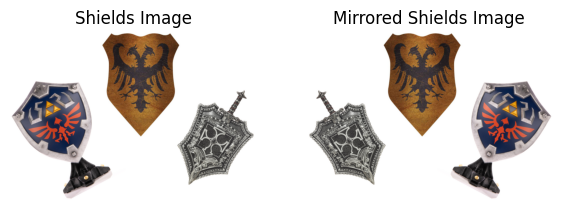

In [24]:
path = "data/input/shield.png"
im = cv2.imread(path, 0)
mirror_im = np.fliplr(im)

im_c = cv2_imread(path)
m_im_c = np.fliplr(im_c)

plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(im_c)
plt.axis('off')
plt.title('Shields Image')

plt.subplot(1,2,2)
plt.imshow(m_im_c)

plt.axis('off')
plt.title('Mirrored Shields Image')
plt.show()

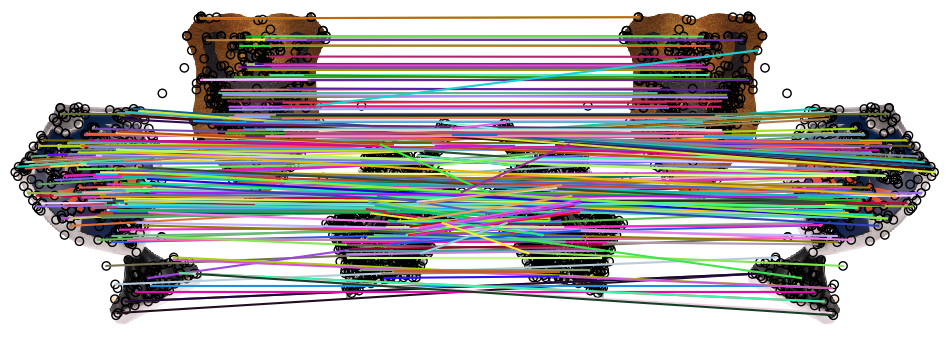

In [25]:
kps, descs, _, _, mir_descs = create_mirror_descriptors(im)
matches = match_mirror_descriptors(descs, mir_descs)
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.axis('off')
plot_mirror_matches(ax, im_c, kps, matches)
plt.show()

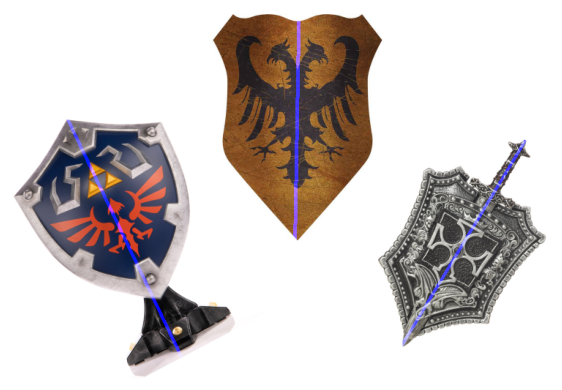

In [26]:
rhos, thetas = hough_vote_mirror(matches, kps, im.shape, window=6, threshold=0.2, num_lines=3)
draw_mirror_line(im_c.copy() , rhos, thetas)

Expected answer:

<img src="data/output/shield.png" width="300" height="200">

This is the end of this lab. Good job!